# STAT306 Final Group 19

# Data Description

In [1]:
# Library Imports
library(tidyverse)
library(corrplot)
library(ggplot2)
library(car)
library(GGally)
library(rsample)
library(caret)


#if needed
#install.packages("corrplot", dependencies=TRUE, repos='http://cran.rstudio.com/')
#install.packages("rsample", dependencies = TRUE, repos = "https://cloud.r-project.org/")

Warning message:
"package 'purrr' was built under R version 4.3.3"
Warning message:
"package 'lubridate' was built under R version 4.3.3"
-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"package 'corrplot' was built under R version 4.3.3"
corrplot 0.95 loaded

Warning message:
"package 'car' was built under R version 4.3.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.3.3"

Attaching package: 'car'


The following object is masked from 'package:dply

In [2]:
gym_membership_data <- read_csv("gym_members_exercise_tracking.csv")
head(gym_membership_data)

Rows: 973 Columns: 15
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (2): Gender, Workout_Type
dbl (13): Age, Weight (kg), Height (m), Max_BPM, Avg_BPM, Resting_BPM, Sessi...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20
46,Female,74.9,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,32.00
32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71
25,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
38,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39
56,Female,58.0,1.68,168,156,74,1.59,1116,HIIT,15.5,2.7,5,3,20.55


In [3]:
num_cols <- ncol(gym_membership_data)
cat("This dataset has", num_cols ,"variables.")

This dataset has 15 variables.

In [4]:
n <- nrow(gym_membership_data)
cat("This dataset has", n ,"observations.")

This dataset has 973 observations.

| Variable | Description |
|----------|-------------|
| `Age` | Age of the gym member (years) |
| `Gender` | Gender of the gym member (Male or Female) |
| `Weight` | Member’s weight in kilograms (kg) |
| `Height` | Member’s height in meters (m) |
| `Max_BPM` | Maximum heart rate during workout sessions (beats per minute) |
| `Avg_BPM` | Average heart rate during workout sessions (beats per minute) |
| `Resting_BPM` | Heart rate at rest before workout (beats per minute) |
| `Session_Duration` | Duration of each workout session (hours) |
| `Calories_Burned` | Total calories burned during each session |
| `Workout_Type` | Type of workout performed (e.g., Cardio, Strength, Yoga, HIIT) |
| `Fat_Percentage` | Body fat percentage of the member (%) |
| `Water_Intake` | Daily water intake during workouts (liters) |
| `Workout_Frequency` | Number of workout sessions per week (days/week) |
| `Experience_Level` | Level of experience, from beginner (1) to expert (3) |
| `BMI` | Body Mass Index (Weight in kg / (Height in m)^2) |

# Questions for Investigation

## Insert text here


# Exploratory Data Analysis (EDA)

In [5]:
head(gym_membership_data, 10)

Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20
46,Female,74.9,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,32.00
32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71
25,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
38,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39
56,Female,58.0,1.68,168,156,74,1.59,1116,HIIT,15.5,2.7,5,3,20.55
36,Male,70.3,1.72,174,169,73,1.49,1385,Cardio,21.3,2.3,3,2,23.76
40,Female,69.7,1.51,189,141,64,1.27,895,Cardio,30.6,1.9,3,2,30.57
28,Male,121.7,1.94,185,127,52,1.03,719,Strength,28.9,2.6,4,2,32.34


In [6]:
gym_membership_data <- gym_membership_data %>%
  mutate(Gender = as.factor(Gender),
         Workout_Type = as.factor(Workout_Type),
         Experience_Level = as.factor(Experience_Level))

In [7]:
# check for NA
colSums(is.na(gym_membership_data))

Age                        Gender 
                            0                             0 
                  Weight (kg)                    Height (m) 
                            0                             0 
                      Max_BPM                       Avg_BPM 
                            0                             0 
                  Resting_BPM      Session_Duration (hours) 
                            0                             0 
              Calories_Burned                  Workout_Type 
                            0                             0 
               Fat_Percentage         Water_Intake (liters) 
                            0                             0 
Workout_Frequency (days/week)              Experience_Level 
                            0                             0 
                          BMI 
                            0

In [8]:
names(gym_membership_data) <- make.names(names(gym_membership_data))
colnames(gym_membership_data)

[1] "Age"                           "Gender"                       
 [3] "Weight..kg."                   "Height..m."                   
 [5] "Max_BPM"                       "Avg_BPM"                      
 [7] "Resting_BPM"                   "Session_Duration..hours."     
 [9] "Calories_Burned"               "Workout_Type"                 
[11] "Fat_Percentage"                "Water_Intake..liters."        
[13] "Workout_Frequency..days.week." "Experience_Level"             
[15] "BMI"

## Data Visualization

In [9]:
# gym_membership_pair_plots <- 
#     gym_membership_data %>%
#     ggpairs(progress = FALSE) +
#     ggtitle("Pairwise Plots of All Variables") +
#     theme(
#         plot.title = element_text(face = "bold", hjust = 0.5, size = 18),
#         text = element_text(size = 10),
#         axis.title = element_text(face = "bold")
#     ) 

# gym_membership_pair_plots

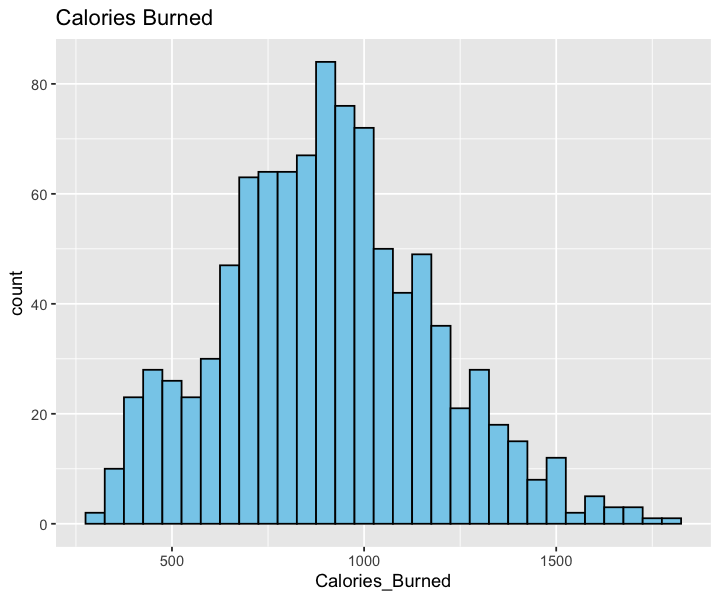

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


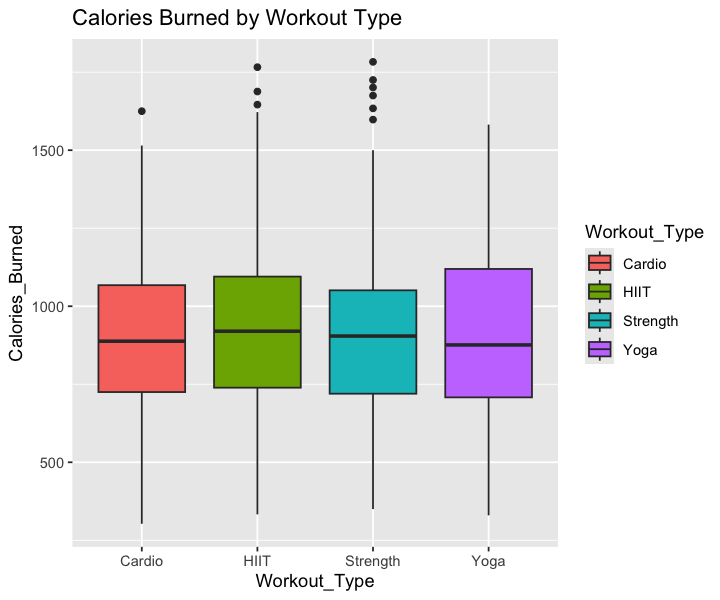

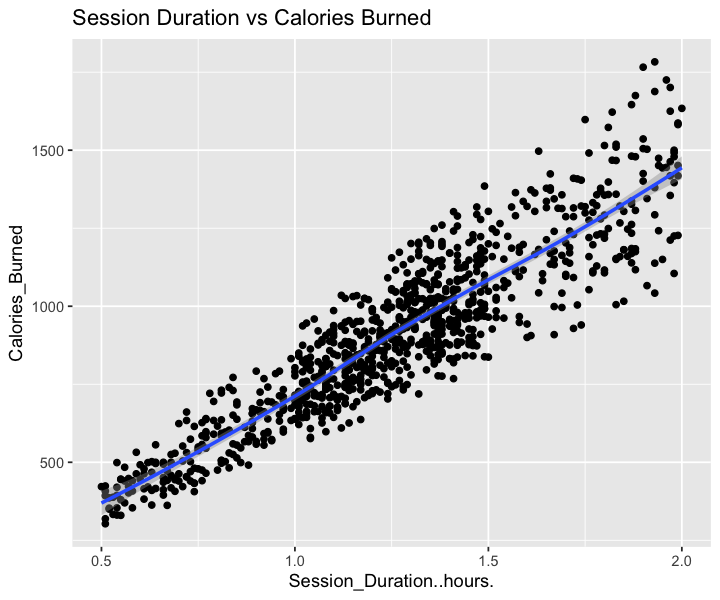

In [10]:
options(repr.plot.width = 6, repr.plot.height = 5)
ggplot(gym_membership_data, aes(x = Calories_Burned)) +
  geom_histogram(binwidth = 50, fill = "skyblue", color = "black") +
  labs(title = "Calories Burned")

ggplot(gym_membership_data, aes(x = Workout_Type, y = Calories_Burned, fill = Workout_Type)) +
  geom_boxplot() +
  labs(title = "Calories Burned by Workout Type")

ggplot(gym_membership_data, aes(x = Session_Duration..hours., y = Calories_Burned)) +
  geom_point() +
  geom_smooth() +
  labs(title = "Session Duration vs Calories Burned")


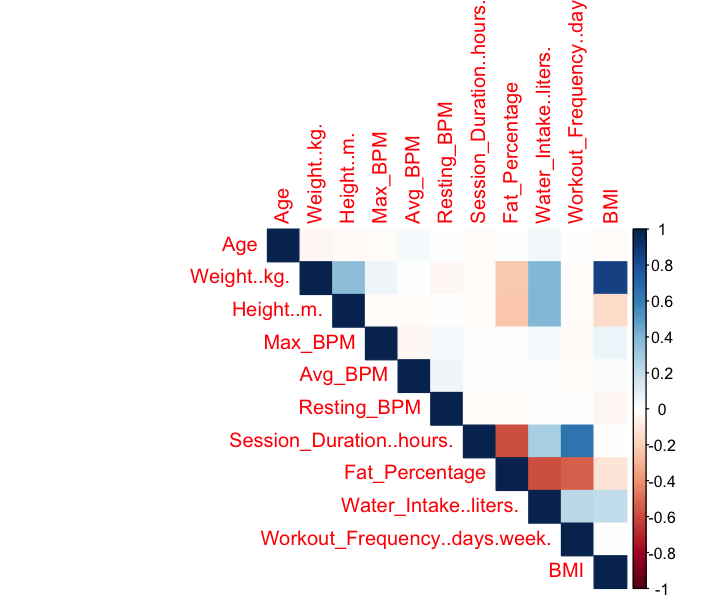

In [11]:
# Correlation matrix for numeric variables
options(repr.plot.width = 6, repr.plot.height = 5)
num_vars <- gym_membership_data %>% 
    select(where(is.numeric)) %>% 
    select(-Calories_Burned)
corrplot(cor(num_vars), method = "color", type = "upper")

# SEIF model diagnostic + selection

'Age''Gender''Weight..kg.''Height..m.''Max_BPM''Avg_BPM''Resting_BPM''Session_Duration..hours.''Calories_Burned''Workout_Type''Fat_Percentage''Water_Intake..liters.''Workout_Frequency..days.week.''Experience_Level''BMI'

In [31]:
base_lm <- lm(Calories_Burned ~ Session_Duration..hours. + Workout_Type + Workout_Frequency..days.week. + Gender + Water_Intake..liters. + Avg_BPM + Age, data = gym_membership_data)
summary(base_lm)


Call:
lm(formula = Calories_Burned ~ Session_Duration..hours. + Workout_Type + 
    Workout_Frequency..days.week. + Gender + Water_Intake..liters. + 
    Avg_BPM + Age, data = gym_membership_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-127.522  -25.350   -1.735   22.666  178.688 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -807.58847   15.16329 -53.259   <2e-16 ***
Session_Duration..hours.       714.27527    5.00971 142.578   <2e-16 ***
Workout_TypeHIIT                -0.97216    3.65517  -0.266   0.7903    
Workout_TypeStrength            -2.48940    3.51295  -0.709   0.4787    
Workout_TypeYoga                -7.34412    3.58292  -2.050   0.0407 *  
Workout_Frequency..days.week.    1.70406    1.83716   0.928   0.3539    
GenderMale                      89.39918    3.58751  24.920   <2e-16 ***
Water_Intake..liters.           -0.50538    3.12450  -0.162   0.8715    
Avg_BPM                   

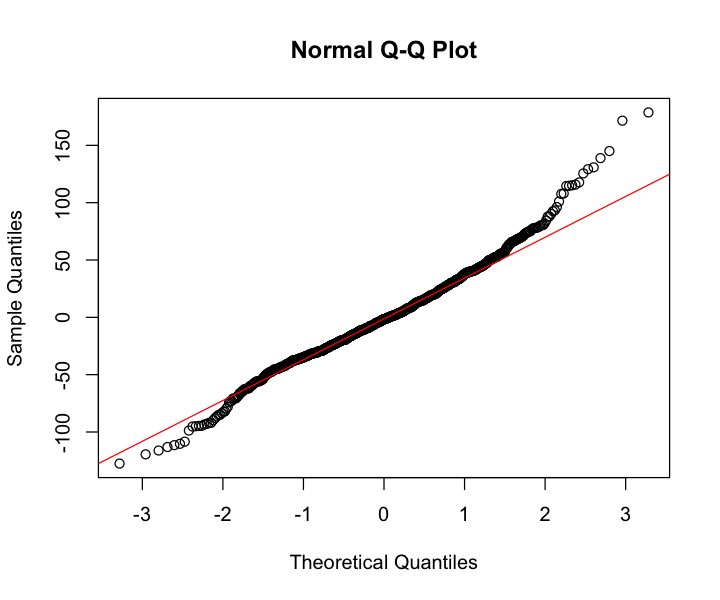

In [32]:
qqnorm(residuals(base_lm))
qqline(residuals(base_lm), col = "red")


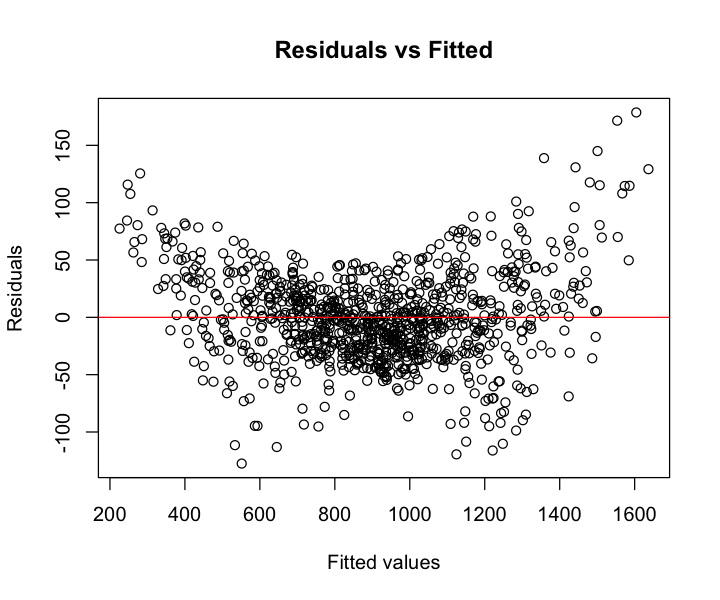

In [33]:
plot(fitted(base_lm), residuals(base_lm),
     xlab = "Fitted values", ylab = "Residuals",
     main = "Residuals vs Fitted")
abline(h = 0, col = "red")


In [44]:
null_model <- lm(Calories_Burned ~ 1, data = gym_membership_train)

full_model <- lm(Calories_Burned ~ 
  Workout_Type * Avg_BPM + 
  Workout_Type * Session_Duration..hours. + 
  Gender * Avg_BPM + 
  Gender * Age + 
  Water_Intake..liters. +
  I(Workout_Frequency..days.week.^2) +
  I(Avg_BPM^2) +
  I(Age^2),
  data = gym_membership_data)

forward_model <- step(null_model, 
                      scope = formula(full_model), 
                      direction = "forward")
summary(forward_model)

Start:  AIC=7635.83
Calories_Burned ~ 1

                                     Df Sum of Sq      RSS    AIC
+ Session_Duration..hours.            1  41522585  8766623 6448.2
+ I(Workout_Frequency..days.week.^2)  1  17456448 32832759 7347.5
+ I(Avg_BPM^2)                        1   5505487 44783720 7558.9
+ Avg_BPM                             1   5482839 44806369 7559.2
+ Water_Intake..liters.               1   5045592 45243616 7565.8
+ I(Age^2)                            1   1214613 49074594 7621.2
+ Age                                 1   1118556 49170651 7622.5
+ Gender                              1    516153 49773055 7630.8
<none>                                            50289207 7635.8
+ Workout_Type                        3    214477 50074730 7638.9

Step:  AIC=6448.23
Calories_Burned ~ Session_Duration..hours.

                                     Df Sum of Sq     RSS    AIC
+ Avg_BPM                             1   5261972 3504650 5825.9
+ I(Avg_BPM^2)                        1


Call:
lm(formula = Calories_Burned ~ Session_Duration..hours. + Avg_BPM + 
    Gender + Age + I(Age^2) + Avg_BPM:Gender, data = gym_membership_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-141.284  -25.049   -0.682   23.772  171.494 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -776.36241   28.58530 -27.159  < 2e-16 ***
Session_Duration..hours.  715.32529    4.44798 160.820  < 2e-16 ***
Avg_BPM                     5.86818    0.15586  37.650  < 2e-16 ***
GenderMale                -10.14830   31.08118  -0.327  0.74414    
Age                        -1.86616    0.92887  -2.009  0.04493 *  
I(Age^2)                   -0.02080    0.01199  -1.734  0.08329 .  
Avg_BPM:GenderMale          0.67024    0.21517   3.115  0.00192 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 40.18 on 674 degrees of freedom
Multiple R-squared:  0.9784,	Adjusted R-squared:  0.9782 
F-s

In [42]:
stepwise_model <- step(full_model, direction = "both", trace = FALSE)
summary(stepwise_model)


Call:
lm(formula = Calories_Burned ~ Workout_Type + Avg_BPM + Session_Duration..hours. + 
    Gender + Age + I(Age^2) + Workout_Type:Avg_BPM + Workout_Type:Session_Duration..hours. + 
    Avg_BPM:Gender, data = gym_membership_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-136.476  -24.281    0.246   22.538  146.825 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                   -761.20860   31.54198 -24.133
Workout_TypeHIIT                               -62.64689   38.00176  -1.649
Workout_TypeStrength                           -93.61257   37.01149  -2.529
Workout_TypeYoga                                18.84350   37.99556   0.496
Avg_BPM                                          5.80580    0.19278  30.117
Session_Duration..hours.                       702.20019    7.09846  98.923
GenderMale                                     -11.89767   25.43669  -0.468
Age                                     

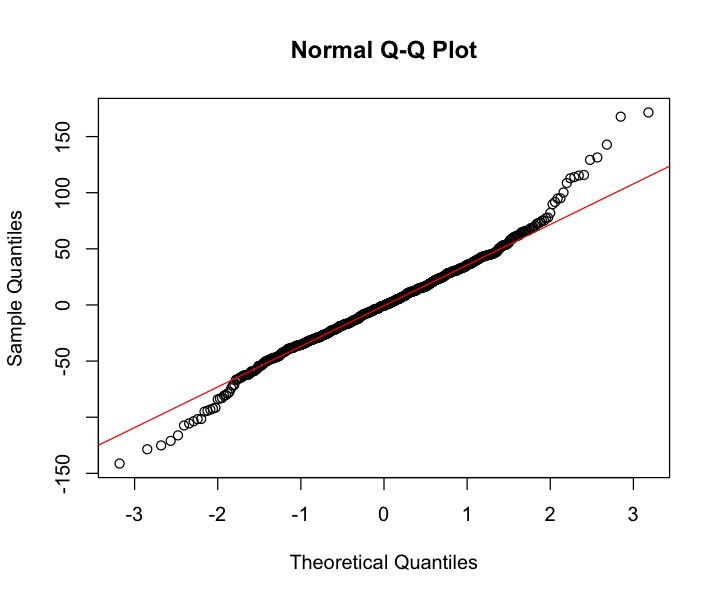

In [40]:
qqnorm(residuals(forward_model))
qqline(residuals(forward_model), col = "red")

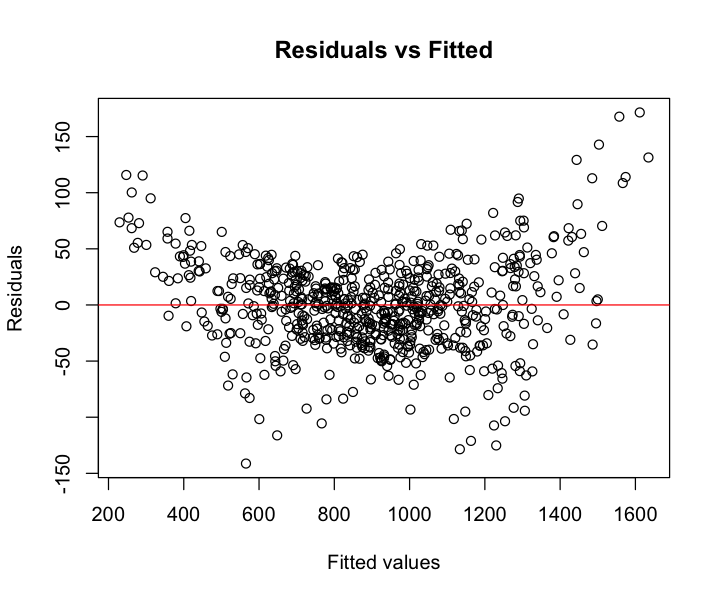

In [41]:
plot(fitted(forward_model), residuals(forward_model),
     xlab = "Fitted values", ylab = "Residuals",
     main = "Residuals vs Fitted")
abline(h = 0, col = "red")

# Base model + motivation for feature selection

In [12]:
split <- initial_split(gym_membership_data, prop = 0.7)
gym_membership_train <- training(split)
gym_membership_test <- testing(split)

In [13]:
base_model <- lm(Calories_Burned ~ ., data = gym_membership_train)
summary(base_model)


Call:
lm(formula = Calories_Burned ~ ., data = gym_membership_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-123.592  -24.866   -3.171   23.959  177.455 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -962.89188  108.18622  -8.900   <2e-16 ***
Age                             -3.44709    0.12996 -26.524   <2e-16 ***
GenderMale                      77.58810    6.37881  12.163   <2e-16 ***
Weight..kg.                     -0.82321    0.61143  -1.346   0.1786    
Height..m.                      90.40298   57.74567   1.566   0.1179    
Max_BPM                          0.01093    0.13687   0.080   0.9364    
Avg_BPM                          6.18465    0.10937  56.550   <2e-16 ***
Resting_BPM                      0.48317    0.21086   2.291   0.0223 *  
Session_Duration..hours.       714.56855    7.30669  97.796   <2e-16 ***
Workout_TypeHIIT                 2.22587    4.49916   0.495   0.6210    
Workout_

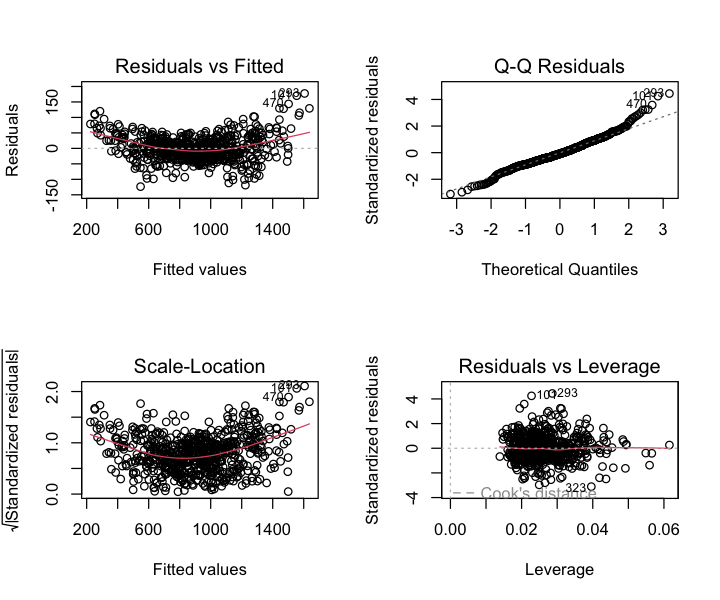

In [14]:
par(mfrow = c(2, 2))
plot(base_model)
par(mfrow = c(1,1))

In [15]:
vif(base_model)

,GVIF,Df,GVIF^(1/(2*Df))
Age,1.023274,1,1.011570
Gender,4.210912,1,2.052051
Weight..kg.,72.695933,1,8.526191
Height..m.,22.010015,1,4.691483
Max_BPM,1.015895,1,1.007916
Avg_BPM,1.020319,1,1.010109
Resting_BPM,1.028239,1,1.014021
Session_Duration..hours.,2.669400,1,1.633830
Workout_Type,1.057844,3,1.009416
Fat_Percentage,5.342149,1,2.311309


In [16]:
null_model <- lm(Calories_Burned ~ 1, data = gym_membership_train)

full_model <- lm(Calories_Burned ~ ., data = gym_membership_train)

forward_model <- step(null_model, 
                      scope = formula(full_model), 
                      direction = "forward")
forward_model

Start:  AIC=7635.83
Calories_Burned ~ 1

                                Df Sum of Sq      RSS    AIC
+ Session_Duration..hours.       1  41522585  8766623 6448.2
+ Experience_Level               2  25293298 24995909 7163.8
+ Fat_Percentage                 1  17347497 32941710 7349.7
+ Workout_Frequency..days.week.  1  16453650 33835557 7368.0
+ Avg_BPM                        1   5482839 44806369 7559.2
+ Water_Intake..liters.          1   5045592 45243616 7565.8
+ Age                            1   1118556 49170651 7622.5
+ Gender                         1    516153 49773055 7630.8
+ Weight..kg.                    1    222679 50066528 7634.8
+ Resting_BPM                    1    173164 50116043 7635.5
<none>                                       50289207 7635.8
+ Height..m.                     1    120303 50168904 7636.2
+ BMI                            1    113415 50175792 7636.3
+ Max_BPM                        1     99528 50189679 7636.5
+ Workout_Type                   3    214477


Call:
lm(formula = Calories_Burned ~ Session_Duration..hours. + Avg_BPM + 
    Gender + Age + Resting_BPM, data = gym_membership_train)

Coefficients:
             (Intercept)  Session_Duration..hours.                   Avg_BPM  
               -825.8520                  715.4364                    6.1960  
              GenderMale                       Age               Resting_BPM  
                 86.1802                   -3.4569                    0.4735  


In [17]:
cv_control <- trainControl(method = "cv", number = 5)

In [18]:
library(caret)

cv_control <- trainControl(method = "cv", number = 5)

model_1 <- train(Calories_Burned ~ Session_Duration..hours., 
                 data = gym_membership_train, method = "lm", trControl = cv_control)

model_2 <- train(Calories_Burned ~ Session_Duration..hours. + Avg_BPM, 
                 data = gym_membership_train, method = "lm", trControl = cv_control)

model_3 <- train(Calories_Burned ~ Session_Duration..hours. + Avg_BPM + Gender, 
                 data = gym_membership_train, method = "lm", trControl = cv_control)

model_4 <- train(Calories_Burned ~ Session_Duration..hours. + Avg_BPM + Gender + Age, 
                 data = gym_membership_train, method = "lm", trControl = cv_control)

model_5 <- train(Calories_Burned ~ Session_Duration..hours. + Avg_BPM + Gender + Age + Resting_BPM, 
                 data = gym_membership_train, method = "lm", trControl = cv_control)

model_6 <- train(Calories_Burned ~ Session_Duration..hours. + Avg_BPM + Gender + Age + Resting_BPM + Fat_Percentage, 
                 data = gym_membership_train, method = "lm", trControl = cv_control)

model_7 <- train(Calories_Burned ~ Session_Duration..hours. + Avg_BPM + Gender + Age + Resting_BPM + Fat_Percentage + BMI, 
                 data = gym_membership_train, method = "lm", trControl = cv_control)



Call:
summary.resamples(object = results)

Models: Model1, Model2, Model3, Model4, Model5, Model6, Model7 
Number of resamples: 5 

MAE 
           Min.  1st Qu.   Median     Mean  3rd Qu.     Max. NA's
Model1 81.74293 86.37068 92.06676 88.94448 92.07067 92.47134    0
Model2 52.80039 53.33037 54.00761 54.33253 55.70968 55.81459    0
Model3 49.48110 50.86093 51.16378 51.19553 51.28602 53.18581    0
Model4 29.23144 29.70124 31.17111 30.74546 31.53122 32.09229    0
Model5 27.76148 30.54673 31.39631 30.76601 31.65285 32.47269    0
Model6 28.86104 29.70195 30.03154 30.88283 30.25331 35.56633    0
Model7 28.90230 29.02238 31.25723 30.91980 31.43573 33.98134    0

RMSE 
            Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Model1 105.41867 109.36931 115.91704 113.98426 118.85790 120.35837    0
Model2  68.58332  69.86442  72.57271  72.05337  73.94260  75.30382    0
Model3  55.26965  57.00480  58.92206  58.41083  59.72801  61.12962    0
Model4  38.04121  40.43808  40.79305  4

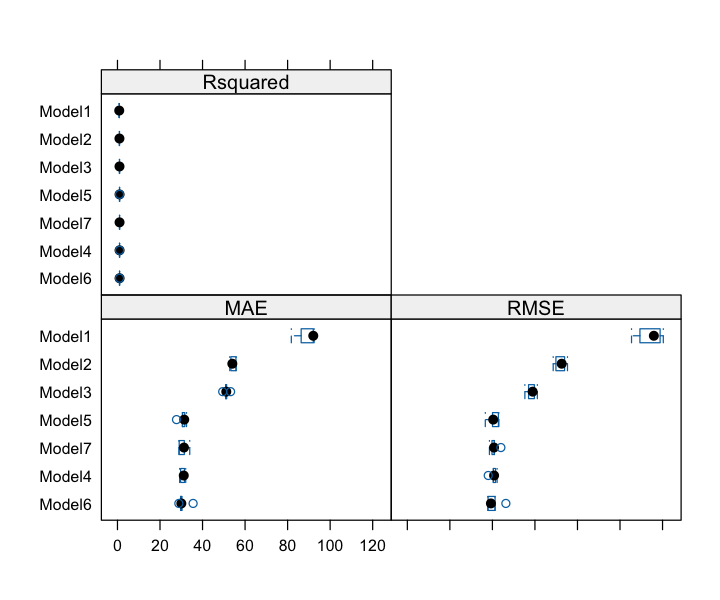

In [19]:
results <- resamples(list(
  Model1 = model_1,
  Model2 = model_2,
  Model3 = model_3,
  Model4 = model_4,
  Model5 = model_5,
  Model6 = model_6,
  Model7 = model_7
))

summary(results)
bwplot(results)  # Boxplot of RMSE, R², MAE across 5 folds
